# Modelos Lineares

---

### SVM - Support Vector Machine

Este classificador utiliza uma matemática bem pesada para funcionar (não é à toa que ele é bem poderoso), então daremos apenas uma visão geral sobre como ele funciona.

Primeiro de tudo: o que é um **vetor de suporte**? Um vetor é dito de suporte quando ele é *classificado incorretamente* ou *está próximo da superfície de decisão*. O SVM utiliza esses vetores para tornar mais rápido o treinamento do modelo, sem precisar analisar todos os dados! Ele é tão poderoso que, se removermos todos os dados que não podem ser um vetor de suporte, o modelo não será afetado!

Vamos começár com o exemplo abaixo, o qual foi obtido do PYthon Data Science Handbook. Utilizaremos uma função para gerar dados sintéticos.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


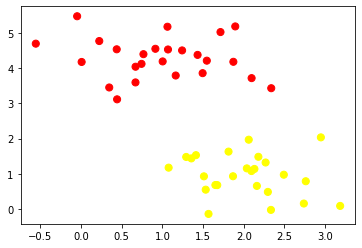

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Conseguimos ver, facilmente, que há diversas maneiras de separar esses dados. Cada separação é um modelo *diferente* do outro, entretanto, eles dividem *perfeitamente* os dados. Porém, supondo que um novo dado chegue (digamos, por exemplo, o X), dependendo do modelo que escolhermos, o elemento será classificado de maneira diferente!

(-1.0, 3.5)

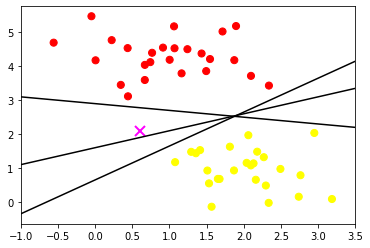

In [ ]:
import numpy as np

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.plot([0.6], [2.1], 'x', color='magenta', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

A ideia por trás do SVM é explotrar a *margem* da superfície de decisão ferado, conforme o exemplo abaixo. O modelo que tiver uma maior marge será o modelo mais adequado.

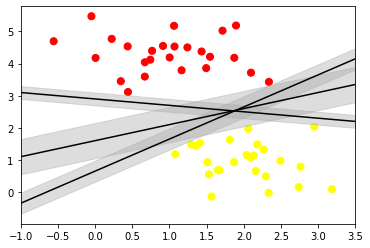

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m * xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                   color='#AAAAAA', alpha=0.4)
  
  plt.xlim(-1, 3.5)

(Ainda bem que) O SVM já está implementado no scikit learn! Podemos importá-lo e usá-lo como os outros modelos já vistos até agora!

In [ ]:
from sklearn.svm import SVC # "Support Vector Classifier"

Vamos definir um modelo com *kernel* linear e um alto valor de *regularização* (explicaremos os conceitos mais adiante no curso).

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Definiremos também uma função para auxiliar na visualização do modelo gerado pelo SVM.

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # Create gfrid to evaluate model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  # Plot decision boundaty and margins
  ax.contour(X, Y, P, colors='k',
             levels=[-1, 0, 1], alpha=0.5,
             linestyles=['--', '-', '--'])

  # Plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none')
    
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

Vamos explorar agora o modelo treinado

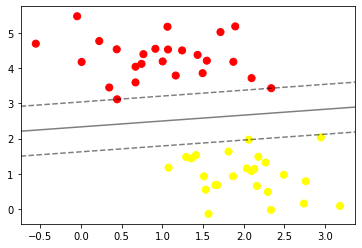

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

O modelo gerado pelo SVM maximizou a margem entre os conjuntos de pontos, conforme o esperado. Qualquer outra linha que tentemos traçár irá diminuir as margens.

Podemos identificar que 3 vetores foram escolhidos como vetores de suporte: 2 vermelhos e 1 amarelo.

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Como dissemos no começo, apenas os vetores de suporte importam! Se removermos os elementos mais distantes da superfície de decisão, por exemplot, não haverá nenhum impacto sobre o treinamento do modelo!

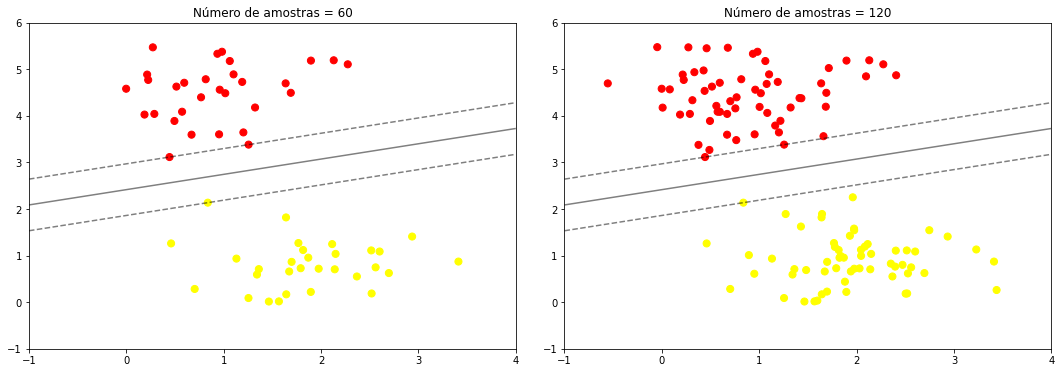

In [ ]:
def train_and_plot_svm(N=10, ax=None):
  X, y = make_blobs(n_samples=200, centers=2,
                    random_state=0, cluster_std=0.6)
  
  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear', C=1E10)
  model.fit(X, y)

  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
  train_and_plot_svm(N, axi)
  axi.set_title('Número de amostras = {0}'.format(N))

## Tá, mas e esse tal de Kernel?
Kernel é uma ferramenta que permite deixar o SVM ainda mais poderoso do que ele já é! Ele permite que transformemos nossos dados de tal maneira que eles possam ser facilmente separáveis!

Suponhamos o seguinte exemplo:

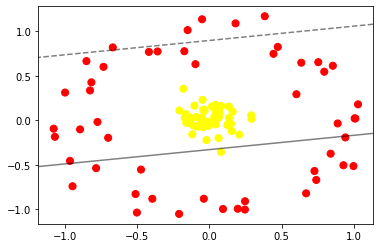

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

model = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, plot_support=False)

Está bem claro que esse dado não é *linearmente separável*, ou seja, não há como separá-lo utilizando apenas uma reta. É ai que o Kernel vai entrar!

Suponha que apliquemos uma *função radial* que seria uma terceira dimensão em nosso dado:

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Agora vamos plotar o dado com essa nova dimensão!

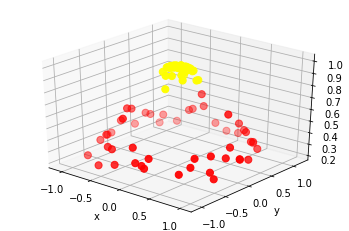

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

plot_3D(elev=30, azim=-50, X=X, y=y)

Não sei para você, mas para mim parece que o dado é *linearmente separável* agora!

Claso, se nossa função radial não tivesse sido escolhida cautelosamente, pode ser que o resultado não fosse tão agradável. Seria bom se pudéssemos fazer essa projeção de uma maneira automática, certo?

Uma maneira *simples* porém *custosa* seria definir uma função radial para cada amostra do dado, ou seja, se temos N amostras, adicionaremos N dimensãoes! Depois, deixamos o SVM identificar os vetores suporte necessários para definir o modelo. Não precisa nem fazer as cotnas para dizer que isso é custoso, certo? Então, como faremos?

Claro que o scikit learn já trouxe tudo implementado para a gente! Lembra-se que haviia definido o *kernel* do modelo como *linear*? Pois bem, basta mudar para RBF (*radial basis function*) que está pronto! E mais: o método é otimizado internamente para que não seja necessário criar N novas dimensões!

In [ ]:
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

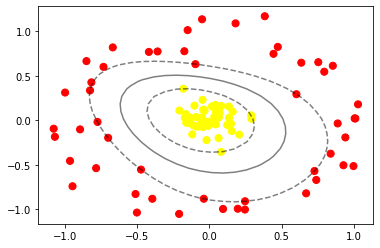

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

## Alguns chamam de mágica. Nós chamamos de CIÊNCIA

### Mas e esse parâmetro $C$?

Calma que o melhor ficou para o final. Vimos nos exemplos anteriores o SVM funcionando para datasets onde os dados estão bem separados (linearmente ou não). Mas suponha o seguinte conjunto de dados:

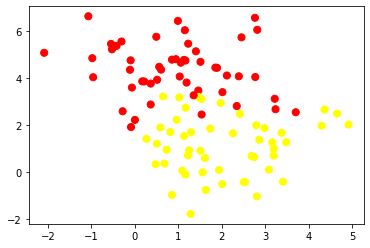

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

No exemplot acima, existem porções dos dados que estão um pouco misturadas. Para tratar isso, o SVM traz um artifício para *suavizar* as margens, permitindo que os pontos sejam classificados errados em prol de um melhor ajuste do modelo (lembra-se que um vetor de suporte também poderia ser um dado classificado erroneamente?). E que controla isso? Exato! É o $C$!

Para maiores valores de $C$, a margem é rígida, impedindo pontos de serem classificados erroneamente. Para valores menores, a margem é *flexível*.

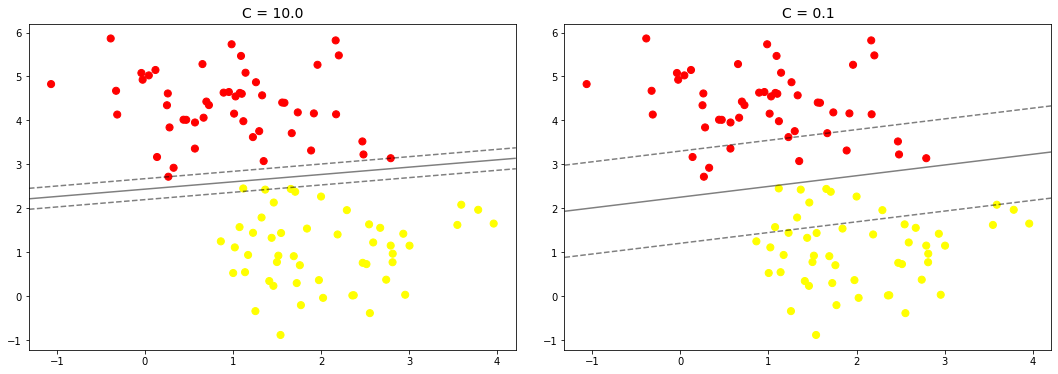

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  model = SVC(kernel='linear', C=C).fit(X, y)
  axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  plot_svc_decision_function(model, axi)
  axi.scatter(model.support_vectors_[:, 0],
              model.support_vectors_[:, 1],
              s=300, lw=1, facecolors='none')
  axi.set_title('C = {0:.1f}'.format(C), size=14)